<a href="https://colab.research.google.com/github/jayant3297/Bio-char-yield-prediction/blob/master/biochar_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Biochar yield predicition

The objective of the project is to determinet the yield of the biomass using 
machine learning regression based models and Artificial Neural networks

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the data set to the project

In [ ]:
data=pd.read_csv("/content/biochar_pred - Sheet1.csv")

We can that the data consist og 59 rows and 20 features.
The data is obtained from different reseach papers (see References)

In [ ]:
data.shape

(59, 20)

Here we can see how the data looks
volatile_bm: percentage of volatiles in biomass
ash_bm: percentage of volatiles in biomass	
fixed carbon_bm	: percentage of fixed carbon in biomass

C_bm: percentage of carbon in biomass	
H_bm: percentage of hydrogen in biomass	
N_bm: percentage of nitrogen in biomass	
O_bm: percentage of oxygen in biomass	
HHV_bm: HHV in biomass in MJ/kg
temp: temperature in C

heating rate: Rate of heating in C/min

C_bc	H_bc	N_bc	O_bc: percentage of C,N,H,O in biochar
volatile_bc	ash_bc	fixed carbon_bc: percentage volatiles,ash and fixed carbon in biochar	

HHV_bc: HHV of biochar in MJ/kg
yield	: Yield of biochar 



In [ ]:
data.sample(5)

,volatile_bm,ash_bm,fixed carbon_bm,C_bm,H_bm,N_bm,O_bm,HHV_bm,temp,heating rate,C_bc,H_bc,N_bc,O_bc,volatile_bc,ash_bc,fixed carbon_bc,HHV_bc,yield,pH
19,85.90,14.10,7.90,48.10,6.80,1.80,49.00,17.30,550,10.0,75.30,2.60,1.00,4.50,21.2,23.4,78.80,26.50,30.3,11.6
44,74.48,5.99,19.53,42.27,5.98,5.98,45.77,NaN,550,NaN,68.42,2.28,0.67,28.63,NaN,NaN,NaN,NaN,31.0,NaN
34,49.10,4.60,25.30,61.57,4.37,1.02,33.04,16.54,500,20.0,84.44,2.88,1.02,11.67,14.3,15.9,67.25,NaN,38.7,10.3
18,77.20,22.80,0.60,52.60,6.20,20.00,53.10,172.00,550,10.0,93.90,3.00,0.40,2.60,8.0,4.1,91.90,33.70,28.2,8.5
12,83.00,3.00,14.00,45.50,6.90,40.60,3.00,24.80,500,50.0,71.79,2.87,3.33,22.01,14.3,8.7,77.00,29.73,26.8,9.3


Getting info about the data and the type of datatypes

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   volatile_bm      59 non-null     float64
 1   ash_bm           59 non-null     float64
 2   fixed carbon_bm  59 non-null     float64
 3   C_bm             59 non-null     float64
 4   H_bm             59 non-null     float64
 5   N_bm             59 non-null     float64
 6   O_bm             59 non-null     float64
 7   HHV_bm           43 non-null     float64
 8   temp             59 non-null     int64  
 9   heating rate     43 non-null     float64
 10  C_bc             59 non-null     float64
 11  H_bc             59 non-null     float64
 12  N_bc             59 non-null     float64
 13  O_bc             59 non-null     float64
 14  volatile_bc      39 non-null     float64
 15  ash_bc           39 non-null     float64
 16  fixed carbon_bc  39 non-null     float64
 17  HHV_bc           3

Determing the mean, mode and median of the data

In [ ]:
data.describe()

,volatile_bm,ash_bm,fixed carbon_bm,C_bm,H_bm,N_bm,O_bm,HHV_bm,temp,heating rate,C_bc,H_bc,N_bc,O_bc,volatile_bc,ash_bc,fixed carbon_bc,HHV_bc,yield,pH
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,43.000000,59.000000,43.000000,59.000000,59.000000,59.000000,59.000000,39.000000,39.000000,39.000000,31.000000,59.000000,35.000000
mean,79.547966,5.211695,13.117627,53.504915,6.384576,15.261695,32.055254,23.780465,461.016949,18.860465,72.653051,3.230339,2.121525,21.492034,15.192051,11.182051,76.578974,27.447419,31.296949,9.263143
std,8.441695,6.156062,4.855361,49.328971,0.569922,18.719686,21.000688,23.445448,107.023924,13.630466,12.008812,1.271968,3.218875,11.369073,8.086012,9.877789,10.119813,4.608842,7.556843,1.076716
min,49.100000,0.240000,0.600000,40.400000,4.370000,0.230000,0.520000,13.450000,220.000000,5.000000,49.600000,0.870000,0.250000,2.600000,3.260000,2.280000,39.100000,11.640000,21.700000,6.100000
25%,74.480000,1.150000,11.245000,45.500000,6.065000,0.415000,3.000000,16.850000,400.000000,10.000000,66.965000,2.585000,0.670000,11.765000,9.485000,7.530000,71.750000,26.945000,28.050000,8.655000
50%,83.000000,3.000000,14.000000,47.580000,6.390000,1.940000,43.510000,19.900000,500.000000,10.000000,71.790000,2.880000,1.100000,21.630000,13.900000,8.600000,78.600000,28.770000,30.500000,9.500000
75%,85.180000,5.860000,15.500000,48.560000,6.900000,40.600000,45.785000,24.800000,550.000000,25.000000,83.790000,3.580000,3.480000,28.130000,19.800000,9.500000,81.285000,29.985000,33.205000,9.835000
max,93.100000,25.900000,25.300000,425.000000,7.600000,45.430000,61.800000,172.000000,600.000000,50.000000,93.900000,6.380000,24.000000,45.530000,43.600000,52.370000,91.900000,33.700000,77.300000,11.600000


## Data Preprocessing 

Replacing the wrong values in the dataset with correct data 

In [ ]:
data=data.replace(to_replace=172,value=17.2)
data=data.replace(to_replace=425,value=42.5)

In [ ]:
data.describe()

,volatile_bm,ash_bm,fixed carbon_bm,C_bm,H_bm,N_bm,O_bm,HHV_bm,temp,heating rate,C_bc,H_bc,N_bc,O_bc,volatile_bc,ash_bc,fixed carbon_bc,HHV_bc,yield,pH
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,43.000000,59.000000,43.000000,59.000000,59.000000,59.000000,59.000000,39.000000,39.000000,39.000000,31.000000,59.000000,35.000000
mean,79.547966,5.211695,13.117627,47.021864,6.384576,15.261695,32.055254,20.180465,461.016949,18.860465,72.653051,3.230339,2.121525,21.492034,15.192051,11.182051,76.578974,27.447419,31.296949,9.263143
std,8.441695,6.156062,4.855361,3.636239,0.569922,18.719686,21.000688,3.792008,107.023924,13.630466,12.008812,1.271968,3.218875,11.369073,8.086012,9.877789,10.119813,4.608842,7.556843,1.076716
min,49.100000,0.240000,0.600000,40.400000,4.370000,0.230000,0.520000,13.450000,220.000000,5.000000,49.600000,0.870000,0.250000,2.600000,3.260000,2.280000,39.100000,11.640000,21.700000,6.100000
25%,74.480000,1.150000,11.245000,45.500000,6.065000,0.415000,3.000000,16.850000,400.000000,10.000000,66.965000,2.585000,0.670000,11.765000,9.485000,7.530000,71.750000,26.945000,28.050000,8.655000
50%,83.000000,3.000000,14.000000,46.210000,6.390000,1.940000,43.510000,19.520000,500.000000,10.000000,71.790000,2.880000,1.100000,21.630000,13.900000,8.600000,78.600000,28.770000,30.500000,9.500000
75%,85.180000,5.860000,15.500000,48.245000,6.900000,40.600000,45.785000,24.800000,550.000000,25.000000,83.790000,3.580000,3.480000,28.130000,19.800000,9.500000,81.285000,29.985000,33.205000,9.835000
max,93.100000,25.900000,25.300000,61.570000,7.600000,45.430000,61.800000,24.800000,600.000000,50.000000,93.900000,6.380000,24.000000,45.530000,43.600000,52.370000,91.900000,33.700000,77.300000,11.600000


## Data Visualization

Temp v/s Yield plot
We can see that very high temperatures results poor yield of biochar

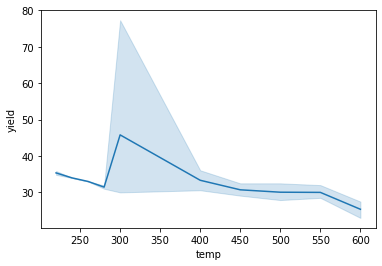

In [ ]:
sns.lineplot(x="temp", y="yield", data=data)

Temp v/s pH plot
Increase in temperature gives high pH value for the biochar

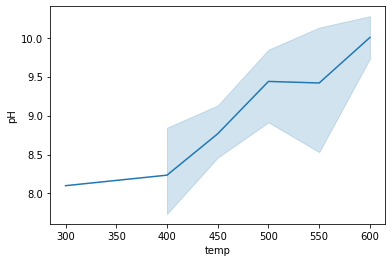

In [ ]:
sns.lineplot(x="temp", y="pH", data=data)

Heating Rate v/ss yield changing temperature 

We can observe the high heating rate gives high yield but at moderate temperture

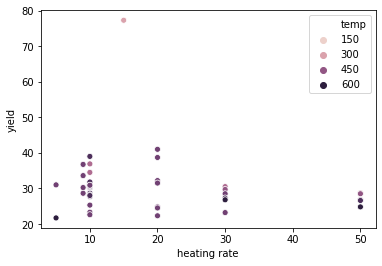

In [ ]:
sns.scatterplot(x="heating rate", y="yield",hue="temp",data=data)

Fixed carbon content v?s temperature

Higher the temperature more is the fixed carbon content in biochar

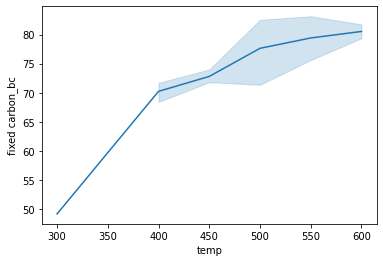

In [ ]:
sns.lineplot(x="temp", y="fixed carbon_bc", data=data)

### Handling Missing Values

From the above table we can see that some columns have missing values 
We are will be filling these values with mean of the data and mode values in case of heating rate 

In [ ]:
data["heating rate"].fillna("10",inplace=True)
data["HHV_bm"].fillna(data.HHV_bm.mean(),inplace=True)
data["volatile_bc"].fillna(data.volatile_bc.mean(),inplace=True)
data["ash_bc"].fillna(data.ash_bc.mean(),inplace=True)
data["HHV_bc"].fillna(data.HHV_bc.mean(),inplace=True)
data["pH"].fillna(data.pH.mean(),inplace=True)

WoW !! 
Now we do no have any missing values 
We can proceed furthur

In [ ]:
missing_value=data.isnull().sum()
missing_value

volatile_bm         0
ash_bm              0
fixed carbon_bm     0
C_bm                0
H_bm                0
N_bm                0
O_bm                0
HHV_bm              0
temp                0
heating rate        0
C_bc                0
H_bc                0
N_bc                0
O_bc                0
volatile_bc         0
ash_bc              0
fixed carbon_bc    20
HHV_bc              0
yield               0
pH                  0
dtype: int64

##### Dropping those columns which are not required for the biochar yield prediction

In [ ]:
data=data.drop(["fixed carbon_bc"],axis=1)

In [ ]:
data.columns

Index(['volatile_bm', 'ash_bm', 'fixed carbon_bm', 'C_bm', 'H_bm', 'N_bm',
       'O_bm', 'HHV_bm', 'temp', 'heating rate', 'C_bc', 'H_bc', 'N_bc',
       'O_bc', 'volatile_bc', 'ash_bc', 'HHV_bc', 'yield', 'pH'],
      dtype='object')

In [ ]:
data_df=data.drop(['C_bc', 'H_bc', 'N_bc','O_bc','volatile_bc', 'ash_bc', 'HHV_bc','pH'],axis=1)

These columns are removed because they are the outputs of heating, not the input variable required for the biochar yield prediction

Viewing the desired columns

In [ ]:
data_df.columns

Index(['volatile_bm', 'ash_bm', 'fixed carbon_bm', 'C_bm', 'H_bm', 'N_bm',
       'O_bm', 'HHV_bm', 'temp', 'heating rate', 'yield'],
      dtype='object')

### Removing the outlier 

In the yield data we can see that, we got a very high value of biochar yield which is too high than the others,this could be due to some error in experimental recordings

Hence we need to remove such an outlier, as this can lead to create confusion for our model

In [ ]:
data_df=data_df.astype(float)

In [ ]:
index_names = data_df[ (data_df['yield'] >= 70)].index 
  
# drop these given row 
# indexes from dataFrame 
data_df.drop(index_names, inplace = True) 
  

So , finally we are have removed the outlier 

Hence we can move forward for the modelling 

In [ ]:
data_df.describe()

,volatile_bm,ash_bm,fixed carbon_bm,C_bm,H_bm,N_bm,O_bm,HHV_bm,temp,heating rate,yield
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,79.721207,5.251552,13.069655,47.002931,6.382931,15.492241,31.857759,20.180465,463.793103,16.482759,30.503793
std,8.408961,6.202144,4.883642,3.665062,0.574759,18.798498,21.128762,3.255041,105.794033,12.366113,4.509975
min,49.100000,0.240000,0.600000,40.400000,4.370000,0.230000,0.520000,13.450000,220.000000,5.000000,21.700000
25%,74.480000,1.150000,10.972500,45.500000,6.037500,0.402500,3.000000,17.225000,412.500000,10.000000,28.025000
50%,83.000000,3.000000,14.000000,46.105000,6.390000,1.965000,43.575000,20.180465,500.000000,10.000000,30.500000
75%,85.180000,5.925000,15.162500,48.307500,6.900000,40.600000,45.792500,23.680000,550.000000,20.000000,33.002500
max,93.100000,25.900000,25.300000,61.570000,7.600000,45.430000,61.800000,24.800000,600.000000,50.000000,42.000000


### Normalizing the data 

It is avery important step as data may have ranges of values like very high values in case of termperature(500,600) and very low values in case of nitrogen content in biomass(0.23,0.9)

Hence we try to normalize data such that the mean becomes 0 and standard deviation 1

In [ ]:
# perform a robust scaler transform of the dataset
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data_ = trans.fit_transform(data_df)
# convert the array back to a dataframe
dataset = pd.DataFrame(data_,columns=['volatile_bm', 'ash_bm', 'fixed carbon_bm', 'C_bm', 'H_bm', 'N_bm',
       'O_bm', 'HHV_bm', 'temp', 'heating rate', 'yield'])
dataset

,volatile_bm,ash_bm,fixed carbon_bm,C_bm,H_bm,N_bm,O_bm,HHV_bm,temp,heating rate,yield
0,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.473684,0.111111,0.630542
1,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.605263,0.111111,0.467980
2,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.736842,0.111111,0.413793
3,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.868421,0.111111,0.344828
4,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,1.000000,0.111111,0.315271
5,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.473684,0.555556,0.433498
6,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.605263,0.555556,0.394089
7,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.736842,0.555556,0.334975
8,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,0.868421,0.555556,0.275862
9,0.770455,0.107560,0.542510,0.240907,0.783282,0.893142,0.040470,1.000000,1.000000,0.555556,0.251232


## Machine Learning Models


X contains all the features required for prediction
Y contains the biochar 

Now,spliting the data into train and test data sets in the 80:20 ratio


In [ ]:
X=dataset.drop("yield",axis=1)
y=dataset["yield"]

In [ ]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

#### Starting with the very simple model 
 **Linear Regression**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=12345) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
y_pred=regr.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred)) 
print(metrics.r2_score(y_test,y_pred))

0.020550522313729246
0.13246072782111906


We can see the values predicted by model is 
Mean Squared Error:0.020550522313729246

R2_score :0.13246072782111906

Plotting the data between the predicted values and the true values and trying to fit a line 

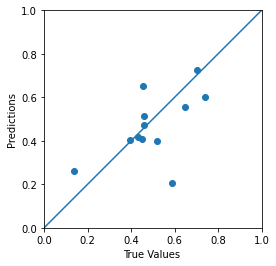

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Support Vector Machine Regressor 

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear',C=1,degree=4)
regressor.fit(X_train,y_train)
y_pred_svr = regressor.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred_svr))
print(metrics.r2_score(y_test,y_pred_svr))

0.01760091480847106
0.25697826120836154


MSE : 0.01760091480847106

R2 _score:0.25697826120836154


Plotting the graph and fitting the line 


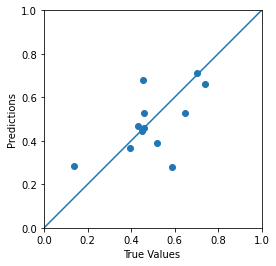

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_svr)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Decision Tree Regressor 

In [ ]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 12345,max_depth=8,max_features='auto')  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)
y_pred_dt=regressor.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred_dt))
print(metrics.r2_score(y_test,y_pred_dt))


0.013379071274433945
0.4352031749530004


MSE: 0.013

R2_score:0.4352

PLotting the graph and fitting the line 

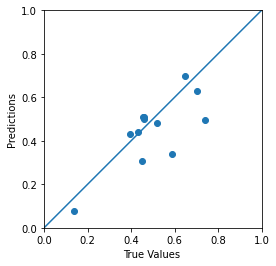

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_dt)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Random Forest Regressor**

In [ ]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 
  
 # create regressor object 
regressor = RandomForestRegressor(n_estimators = 50, random_state =3,max_depth=8,n_jobs=-1,min_samples_leaf=3,max_features='auto') 
# fit the regressor with x and y data 
regressor.fit(X_train, y_train)
y_pred_rf = regressor.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred_rf))
print(metrics.r2_score(y_test,y_pred_rf))


0.012936525813430131
0.4538852094669761


MSE: 0.0129

R2_score : 0.4538

Plotting the graph and fitting the line

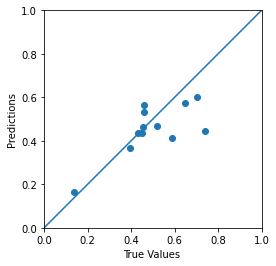

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_rf)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Gradient Boosting Regression**

In [ ]:
from sklearn import ensemble
params = {'n_estimators': 150,
          'max_depth': 8,
          'learning_rate': 0.01,
          'loss': 'ls',
          'max_features':'auto',
          'min_samples_leaf':2,
          'random_state':12345,
          'verbose':2}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
y_pred_gb=reg.predict(X_test)
print(metrics.mean_squared_error(y_test,y_pred_gb))
print(metrics.r2_score(y_test,y_pred_gb))


      Iter       Train Loss   Remaining Time 
         1           0.0526            0.45s
         2           0.0517            0.29s
         3           0.0508            0.23s
         4           0.0499            0.20s
         5           0.0490            0.18s
         6           0.0481            0.17s
         7           0.0473            0.16s
         8           0.0464            0.16s
         9           0.0456            0.15s
        10           0.0448            0.15s
        11           0.0440            0.14s
        12           0.0432            0.14s
        13           0.0425            0.14s
        14           0.0417            0.13s
        15           0.0410            0.13s
        16           0.0403            0.13s
        17           0.0396            0.13s
        18           0.0389            0.13s
        19           0.0382            0.13s
        20           0.0375            0.13s
        21           0.0369            0.13s
        2

MSE: 0.00939

R2_score : 0.60322

Plotting the graph and fitting the line

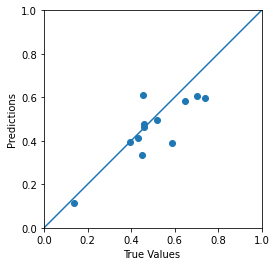

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_gb)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**XGBoost Regressor**

In [ ]:
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor 
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.9, learning_rate = 0.01,
                max_depth = 12, alpha = 0.1, n_estimators = 150,subsample=1,random_state=42,scoring=make_scorer(r2_score),verbose=1)
model.fit(X_train,y_train)
y_pred_xg=model.predict(X_test)

# Root Squared Error
print(metrics.mean_squared_error(y_test,y_pred_xg))
print(metrics.r2_score(y_test,y_pred_xg))


0.013986030285204573
0.4095804306544487


MSE: 0.0139

R2_score : 0.4095

Plotting the graph and fitting the line

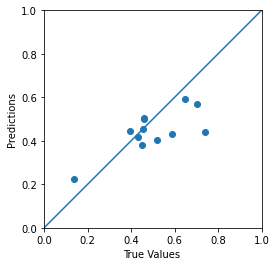

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_xg)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

GridSearch **CV**

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', verbose=False)
reg = GridSearchCV(estimator=xgb_model,  
                   scoring=make_scorer(r2_score),
                   param_grid= {'max_depth': [8], 'n_estimators': [150]}, 
                   verbose=True)

reg.fit(X_train, y_train)
y_pred_cv=reg.predict(X_test)

reg.best_score_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


0.40972649472219186



R2_score : 0.4097

Plotting the graph and fitting the line

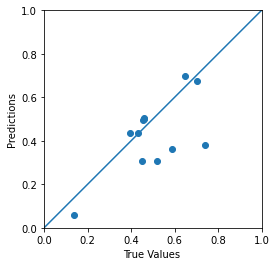

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_cv)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

#### **Artificial Neural Network **

Installing the libraries required and the importing the required libraries 


In [ ]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-y4anrzrt
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-y4anrzrt
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0c185f9ef2d3eed3d6afa48babc4b3e30dee1eb3f_-cp36-none-any.whl size=143515 sha256=30a61ee5aeb5da2538fef38fb8d454844b700881643412513d05863451a2083e
  Stored in directory: /tmp/pip-ephem-wheel-cache-5wti3tye/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Devolping the model with 10 input layers,1 hidden layers and 1 output layer

RMSProp is use as an optimizer and relu as activation function


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# define base model
def baseline_model():
	model=Sequential()
	model.add(Dense(10,input_dim=10,kernel_initializer='normal',activation='relu'))
	model.add(Dense(10,kernel_initializer='normal',activation='relu'))
	model.add(Dense(5,kernel_initializer='normal',activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	model.compile(loss='mse',optimizer='RMSprop',metrics=['mse','mae'])
	return model



	
model=baseline_model()
model.summary()


Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_60 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 6         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


Running the above model for 1000 epoches and determing the mse and mae values

In [ ]:
EPOCHS = 1000

history = model.fit(X_train,y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.2129,  mae:0.4050,  mse:0.2129,  val_loss:0.2720,  val_mae:0.4524,  val_mse:0.2720,  
....................................................................................................
Epoch: 100, loss:0.0462,  mae:0.1653,  mse:0.0462,  val_loss:0.0728,  val_mae:0.2178,  val_mse:0.0728,  
....................................................................................................
Epoch: 200, loss:0.0370,  mae:0.1428,  mse:0.0370,  val_loss:0.0675,  val_mae:0.1886,  val_mse:0.0675,  
....................................................................................................
Epoch: 300, loss:0.0333,  mae:0.1292,  mse:0.0333,  val_loss:0.0689,  val_mae:0.1812,  val_mse:0.0689,  
....................................................................................................
Epoch: 400, loss:0.0311,  mae:0.1209,  mse:0.0311,  val_loss:0.0679,  val_mae:0.1788,  val_mse:0.0679,  
........................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
0,0.212927,0.212927,0.405030,0.272029,0.272029,0.452371,0
1,0.207581,0.207581,0.398453,0.267436,0.267436,0.448278,1
2,0.203590,0.203590,0.393383,0.263720,0.263720,0.444932,2
3,0.200288,0.200288,0.389193,0.260059,0.260059,0.441606,3
4,0.197107,0.197107,0.385025,0.256926,0.256926,0.438737,4
...,...,...,...,...,...,...,...
995,0.021957,0.021957,0.088193,0.044338,0.044338,0.166927,995
996,0.021909,0.021909,0.089284,0.042926,0.042926,0.162321,996
997,0.021925,0.021925,0.087691,0.042767,0.042767,0.161849,997
998,0.021915,0.021915,0.087288,0.045390,0.045390,0.170530,998


Finally fitting the data for the ANN model

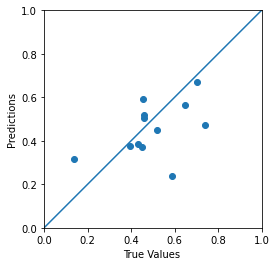

In [ ]:
test_predictions = model.predict(X_test)

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values ')
plt.ylabel('Predictions')
lims = [0,1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Visualizing how MAE and MSE values have been optimized by the model with the number of epoches

Text(0, 0.5, 'MAE')

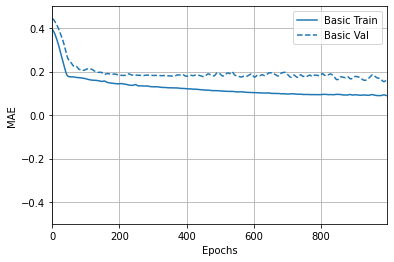

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([-0.5,0.5])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

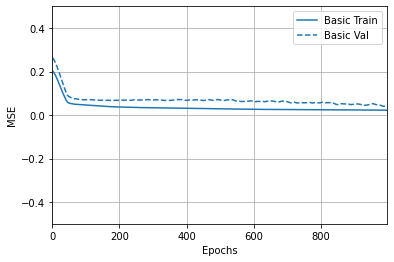

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([-0.5,0.5])
plt.ylabel('MSE')

Finally we can see how different models works and they reduced the MSE.